In [2]:
from keras.layers import Dense, Flatten, Dropout
import keras
from keras.metrics import categorical_crossentropy
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
def load_data(directory):
    X_data, y_data = [], []
    for i in os.listdir(directory):
        if i == 'Cat':
            y = 0
        else:
            y = 1
        for img_path in os.listdir(f'{directory}/{i}'):
            img = cv2.imread(f'{directory}/{i}/{img_path}', cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (48, 48), interpolation = cv2.INTER_AREA)
            X_data.append(np.array(img))
            y_data.append(y)


    X_data = np.array(X_data)
    y_data = np.array(y_data)

    return X_data, y_data

In [4]:
X, y = load_data('img')

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1488, test_size=0.1)
y_train = keras.utils.to_categorical(y_train, 2) 
y_test = keras.utils.to_categorical(y_test, 2) 

In [6]:
x_train = x_train * 1./255 
x_test = x_test * 1./255

In [7]:
x_train = x_train.reshape(x_train.shape[0], -1) 
x_test = x_test.reshape(x_test.shape[0], -1) 

In [8]:
model = keras.Sequential()
model.add(Dense(units=2304, input_shape=(2304,), activation='relu'))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [9]:
model.compile(
  optimizer='adam',
  loss=categorical_crossentropy,
  metrics=['accuracy'])

In [10]:
model.fit(x=x_train, y=y_train, batch_size=32, epochs=10)

Epoch 1/10
702/702 [==============================] - 31s 44ms/step - loss: 0.7054 - accuracy: 0.5577
Epoch 2/10
702/702 [==============================] - 35s 50ms/step - loss: 0.6694 - accuracy: 0.5833
Epoch 3/10
702/702 [==============================] - 32s 46ms/step - loss: 0.6610 - accuracy: 0.6009
Epoch 4/10
702/702 [==============================] - 31s 45ms/step - loss: 0.6577 - accuracy: 0.6065
Epoch 5/10
702/702 [==============================] - 31s 44ms/step - loss: 0.6563 - accuracy: 0.6081
Epoch 6/10
702/702 [==============================] - 31s 45ms/step - loss: 0.6537 - accuracy: 0.6119
Epoch 7/10
702/702 [==============================] - 31s 45ms/step - loss: 0.6529 - accuracy: 0.6163
Epoch 8/10
702/702 [==============================] - 33s 47ms/step - loss: 0.6480 - accuracy: 0.6185
Epoch 9/10
702/702 [==============================] - 31s 45ms/step - loss: 0.6468 - accuracy: 0.6204
Epoch 10/10
702/702 [==============================] - 32s 46ms/step - loss: 0.642

In [42]:
img = cv2.imread('123.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (48, 48), interpolation = cv2.INTER_AREA)

img = img * 1./255
img = img.reshape((1, 2304))

img_1 = np.array([x_test[5]])

In [27]:
y_test[5]

array([1., 0.], dtype=float32)

In [43]:
model.predict(img)

1/1 [==============================] - 0s 13ms/step


array([[0.6484099, 0.3515901]], dtype=float32)

In [22]:
model.predict(img_1)

1/1 [==============================] - 0s 14ms/step


array([[0.83015573, 0.1698443 ]], dtype=float32)

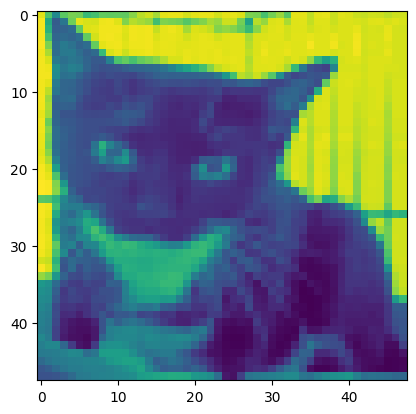

In [23]:
imgplot = plt.imshow(img_1.reshape((48, 48)))
plt.show()

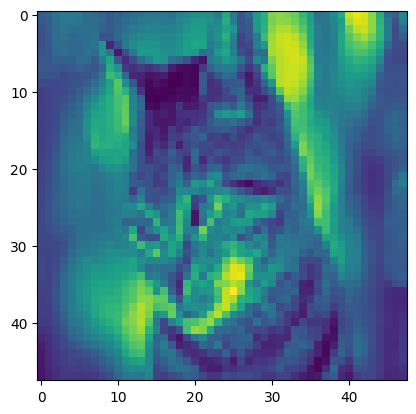

In [44]:
imgplot = plt.imshow(img.reshape((48, 48)))
plt.show()

In [16]:
def check_result(predicted_data):
    high_index = predicted_data.argmax()
    if high_index == 0:
        return np.array([1, 0], dtype=np.float32)
    else:
        return np.array([0, 1], dtype=np.float32)

In [17]:
print(check_result(model.predict(img_1)))

1/1 [==============================] - 0s 14ms/step
[1. 0.]


In [18]:
y_test[9]

array([0., 1.], dtype=float32)

In [45]:
model.save('dogs_and_cats.h5')

C:\Users\stepan\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
